In [556]:
# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:
#### You are required to model the demand for shared bikes with the available independent variables. 
#### It will be used by the management to understand how exactly the demands vary with different features. 
#### They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
#### Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [557]:
#python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [558]:
#read the data
bike_rent = pd.read_csv('day.csv')
bike_rent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [559]:
bike_rent.shape

(730, 16)

In [560]:
bike_rent.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [561]:
bike_rent.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Visualize the numeric variables

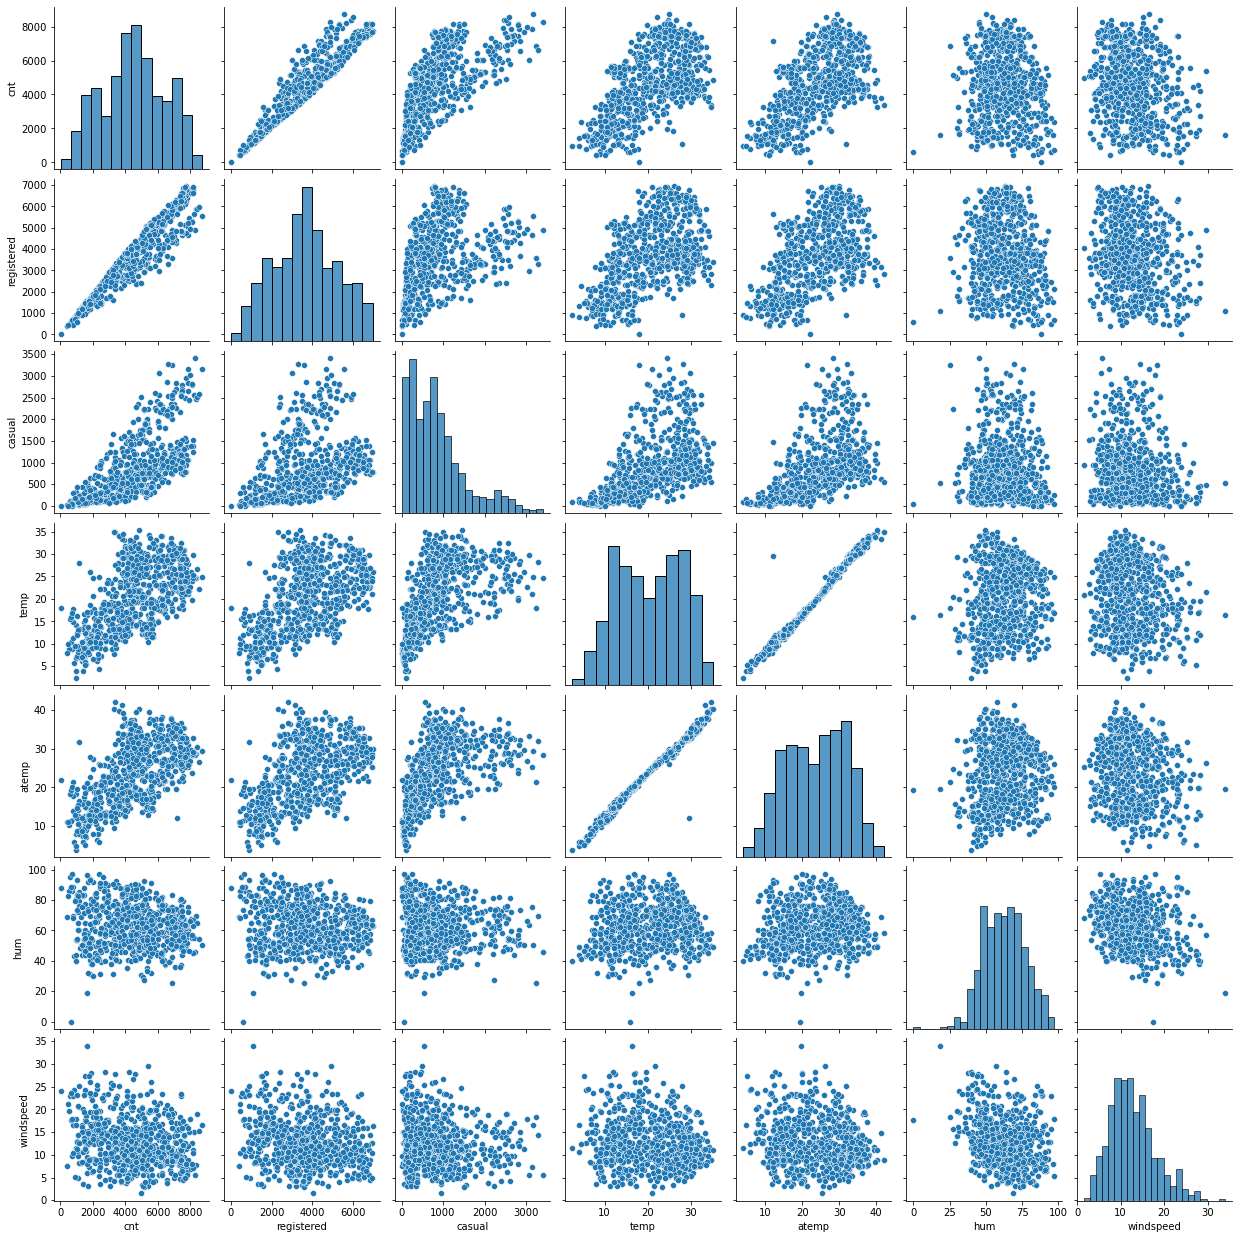

In [562]:
sns.pairplot(bike_rent[['cnt','registered','casual','temp','atemp','hum','windspeed']])
plt.show()

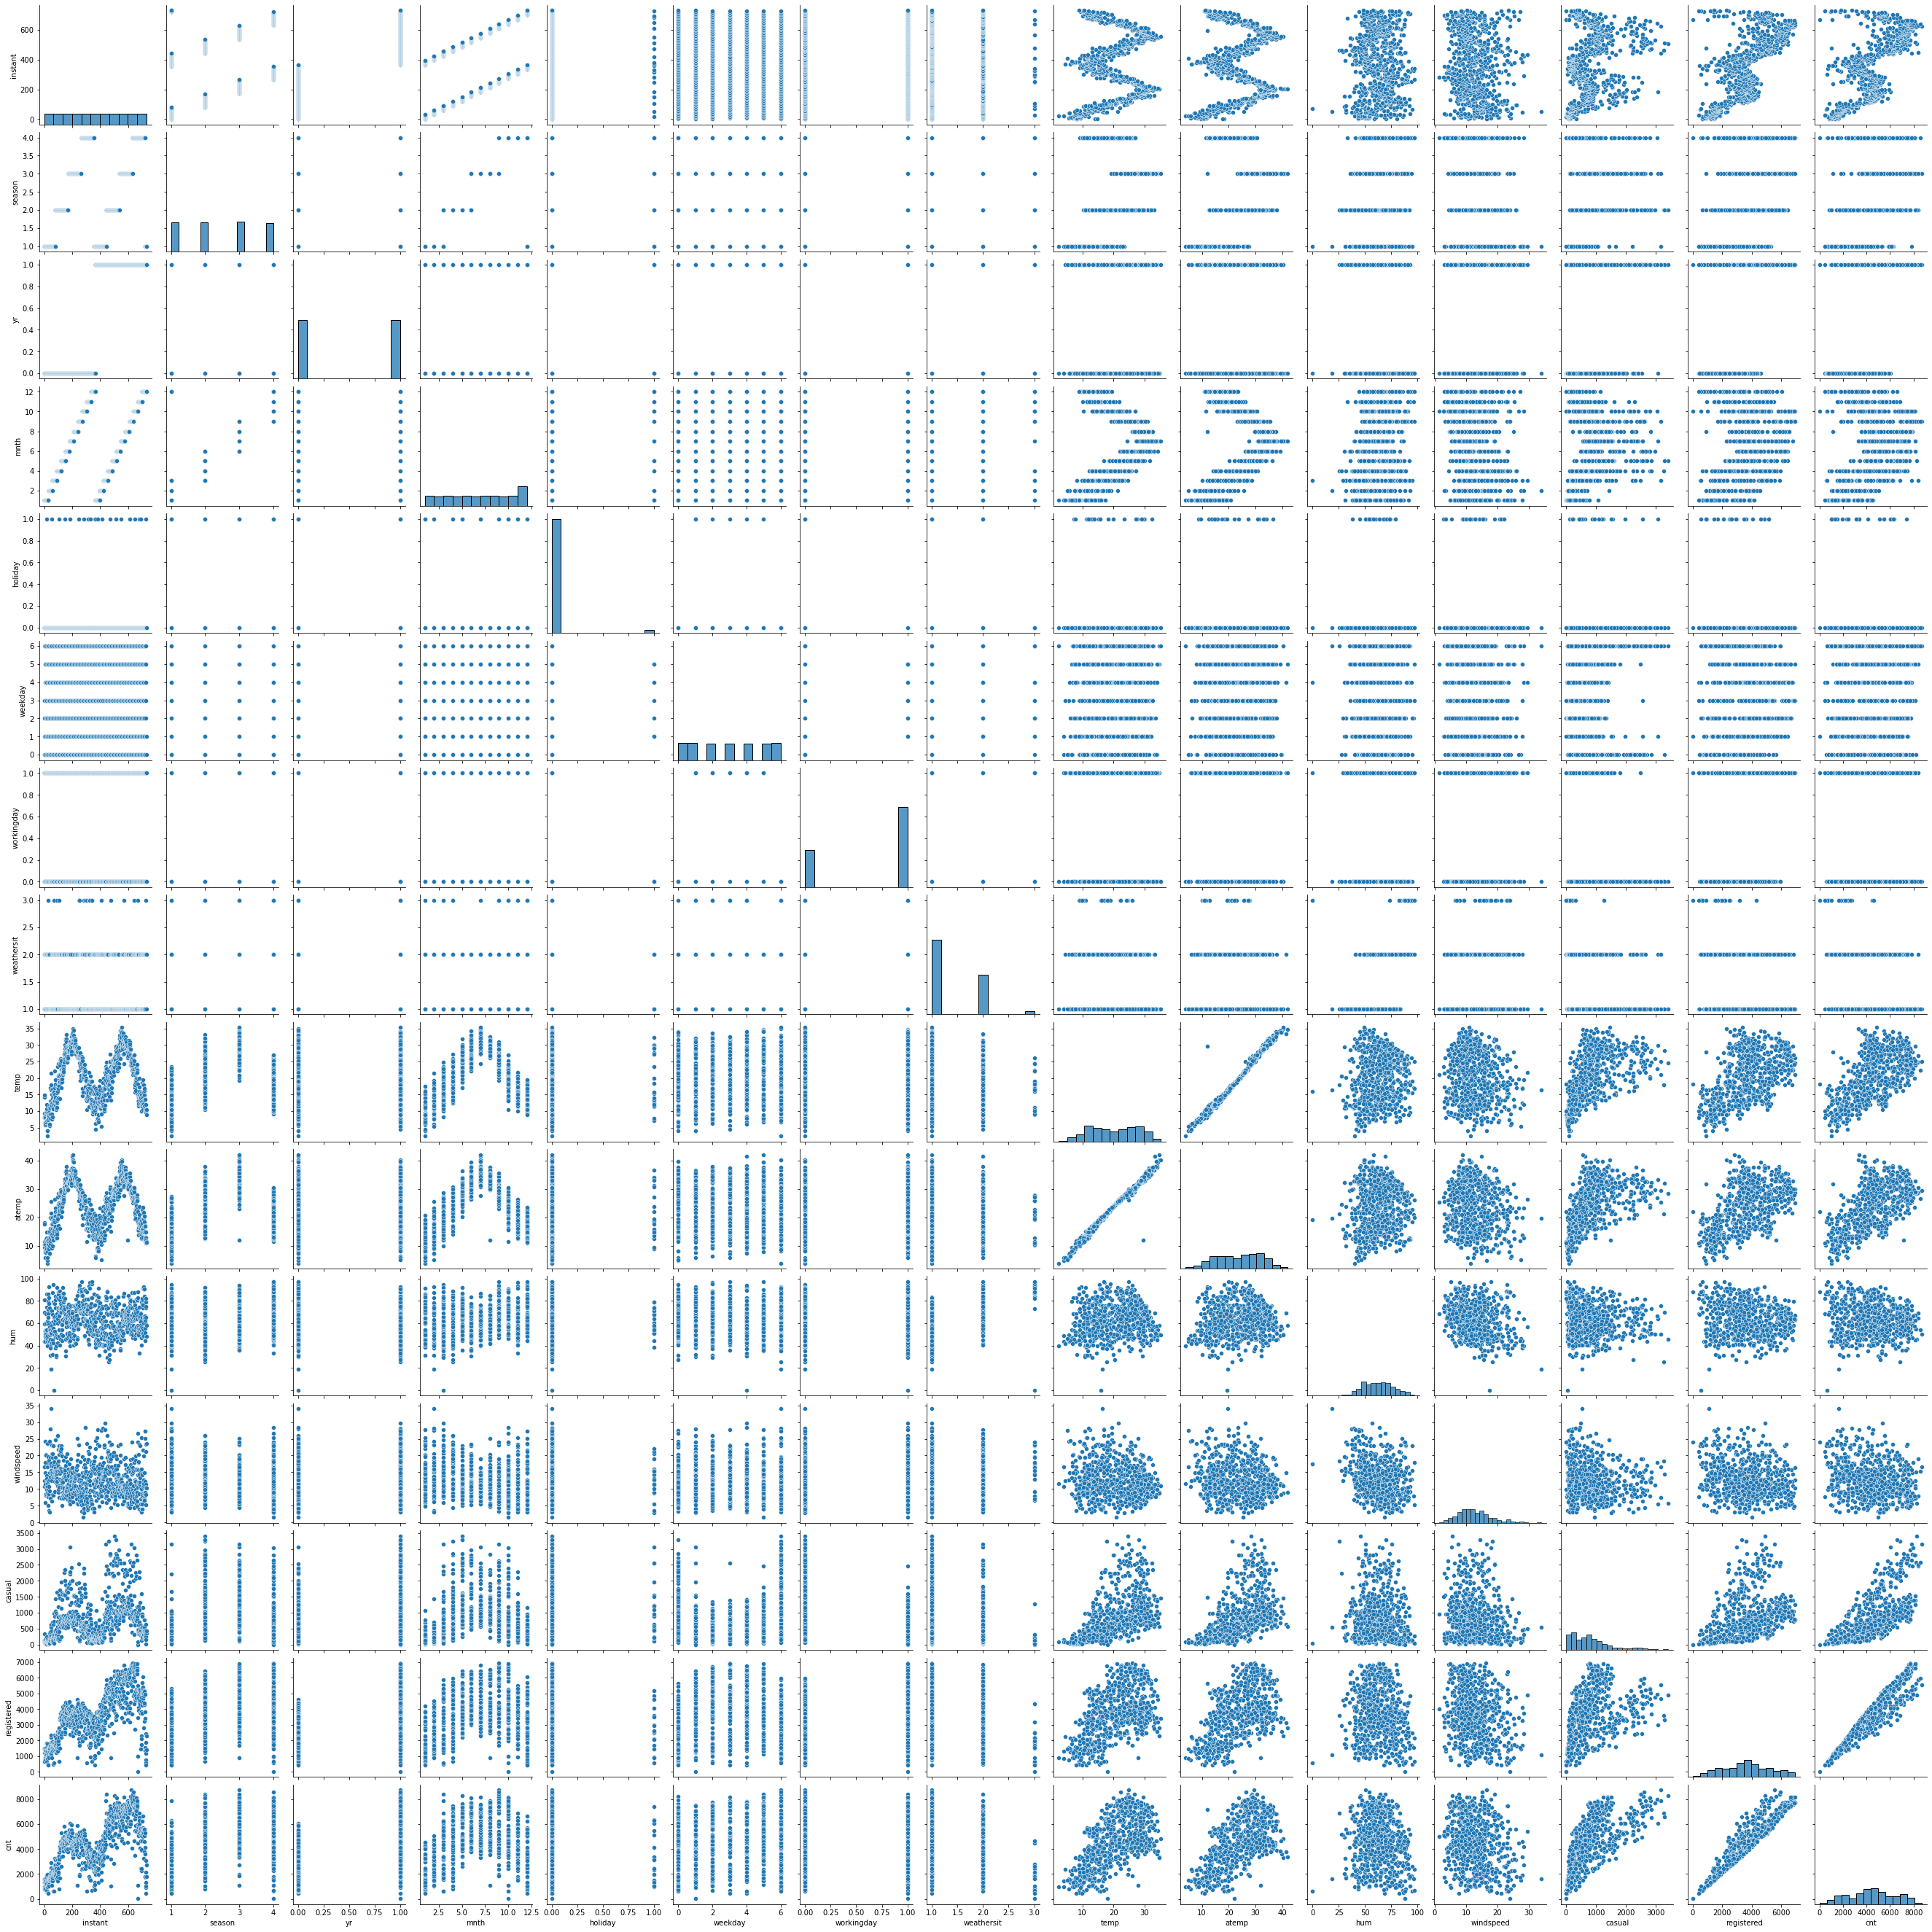

In [563]:
sns.pairplot(bike_rent)
plt.show()

In [564]:
#Cnt,Registered, Casual has linear relationship with 
# atemp and temp

## Visualize the Categorical Variable

<AxesSubplot:xlabel='season', ylabel='casual'>

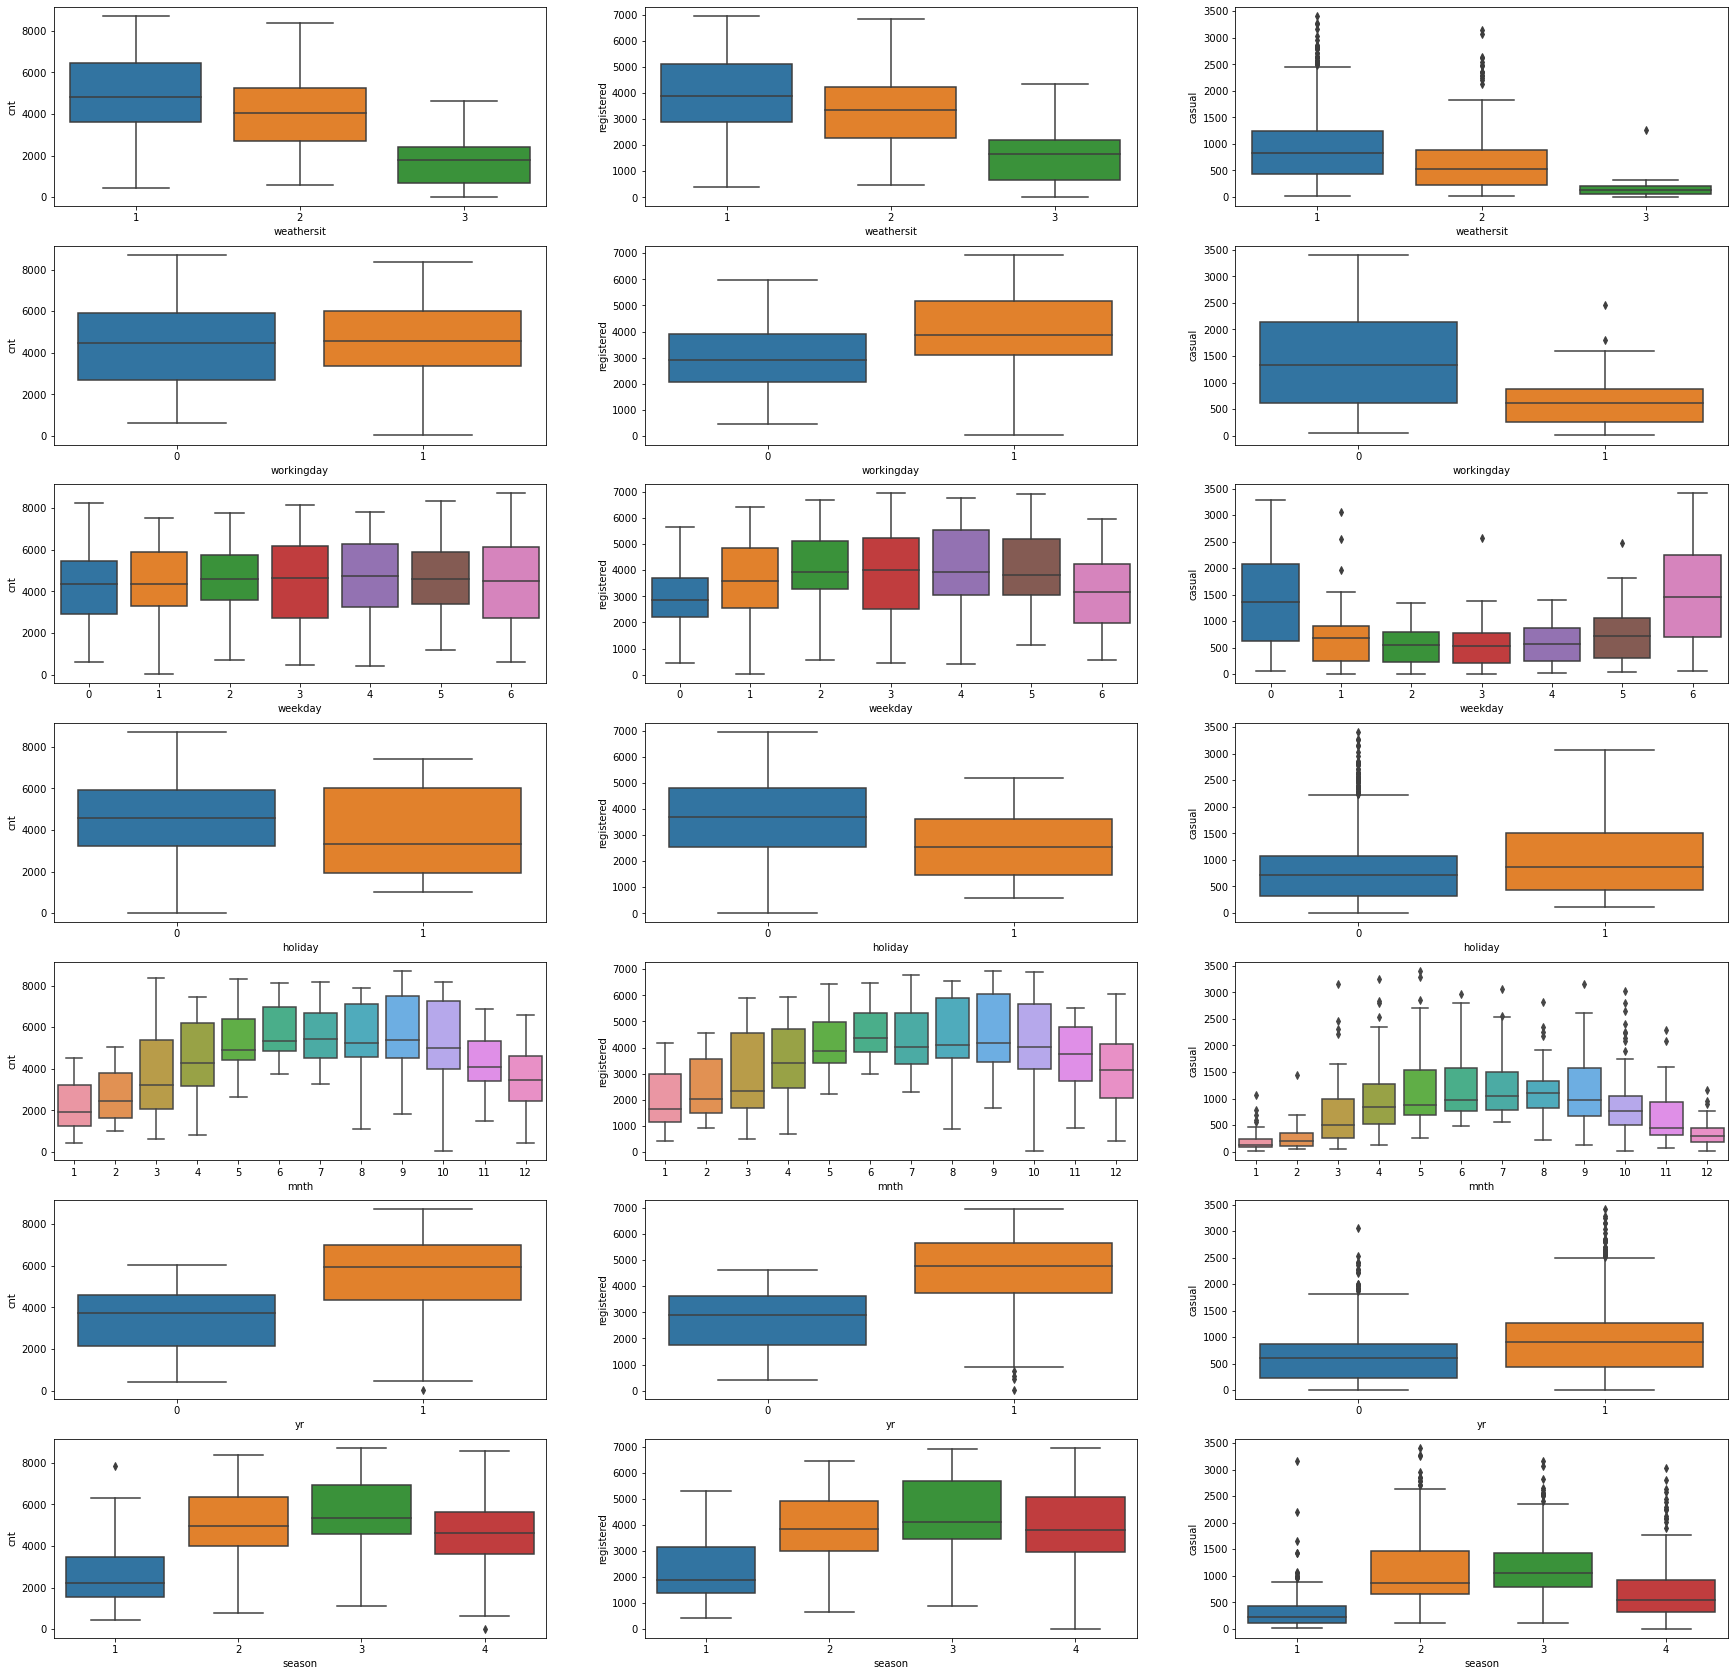

In [565]:
plt.figure(figsize=(30,30))
plt.subplot(7,3,1)
sns.boxplot(x='weathersit',y='cnt',data=bike_rent)
plt.subplot(7,3,2)
sns.boxplot(x='weathersit',y='registered',data=bike_rent)
plt.subplot(7,3,3)
sns.boxplot(x='weathersit',y='casual',data=bike_rent)
plt.subplot(7,3,4)
sns.boxplot(x='workingday',y='cnt',data=bike_rent)
plt.subplot(7,3,5)
sns.boxplot(x='workingday',y='registered',data=bike_rent)
plt.subplot(7,3,6)
sns.boxplot(x='workingday',y='casual',data=bike_rent)
plt.subplot(7,3,7)
sns.boxplot(x='weekday',y='cnt',data=bike_rent)
plt.subplot(7,3,8)
sns.boxplot(x='weekday',y='registered',data=bike_rent)
plt.subplot(7,3,9)
sns.boxplot(x='weekday',y='casual',data=bike_rent)
plt.subplot(7,3,10)
sns.boxplot(x='holiday',y='cnt',data=bike_rent)
plt.subplot(7,3,11)
sns.boxplot(x='holiday',y='registered',data=bike_rent)
plt.subplot(7,3,12)
sns.boxplot(x='holiday',y='casual',data=bike_rent)
plt.subplot(7,3,13)
sns.boxplot(x='mnth',y='cnt',data=bike_rent)
plt.subplot(7,3,14)
sns.boxplot(x='mnth',y='registered',data=bike_rent)
plt.subplot(7,3,15)
sns.boxplot(x='mnth',y='casual',data=bike_rent)
plt.subplot(7,3,16)
sns.boxplot(x='yr',y='cnt',data=bike_rent)
plt.subplot(7,3,17)
sns.boxplot(x='yr',y='registered',data=bike_rent)
plt.subplot(7,3,18)
sns.boxplot(x='yr',y='casual',data=bike_rent)
plt.subplot(7,3,19)
sns.boxplot(x='season',y='cnt',data=bike_rent)
plt.subplot(7,3,20)
sns.boxplot(x='season',y='registered',data=bike_rent)
plt.subplot(7,3,21)
sns.boxplot(x='season',y='casual',data=bike_rent)


### Observations from the above plot
#### Weather situation seems to have an impact on count
#### weekday which day does not seem to matter
#### holiday mean lesser
#### mnth matters. There is significantly less count over the initial and final months
#### yr there has been significant increase in the second year 
#### season has lot of correlation - significantly less in Spring and winter. Fall and Summer are high

## Step 2: Preparing the Data for Modelling

In [566]:
df_train,df_test = train_test_split(bike_rent,train_size=0.70,random_state=100)
print(bike_rent.shape)
print(df_train.shape)
print(df_test.shape)

(730, 16)
(510, 16)
(220, 16)


In [567]:
#Remove the dteday column. It will not add any value
df_train.pop('dteday')
df_train.pop('instant')
df_test.pop('dteday')
df_test.pop('instant')

184    185
535    536
299    300
221    222
152    153
      ... 
702    703
127    128
640    641
72      73
653    654
Name: instant, Length: 220, dtype: int64

In [568]:
print(bike_rent.shape)
print(df_train.shape)
print(df_test.shape)

(730, 16)
(510, 14)
(220, 14)


In [569]:
#Instantiate an object
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt','season','mnth','weekday','weathersit']

#Fit the data
#fit - learn the max and min value
#transform - it computes the std values
#fit_transform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973
111,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095


In [570]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Training the Model

<AxesSubplot:>

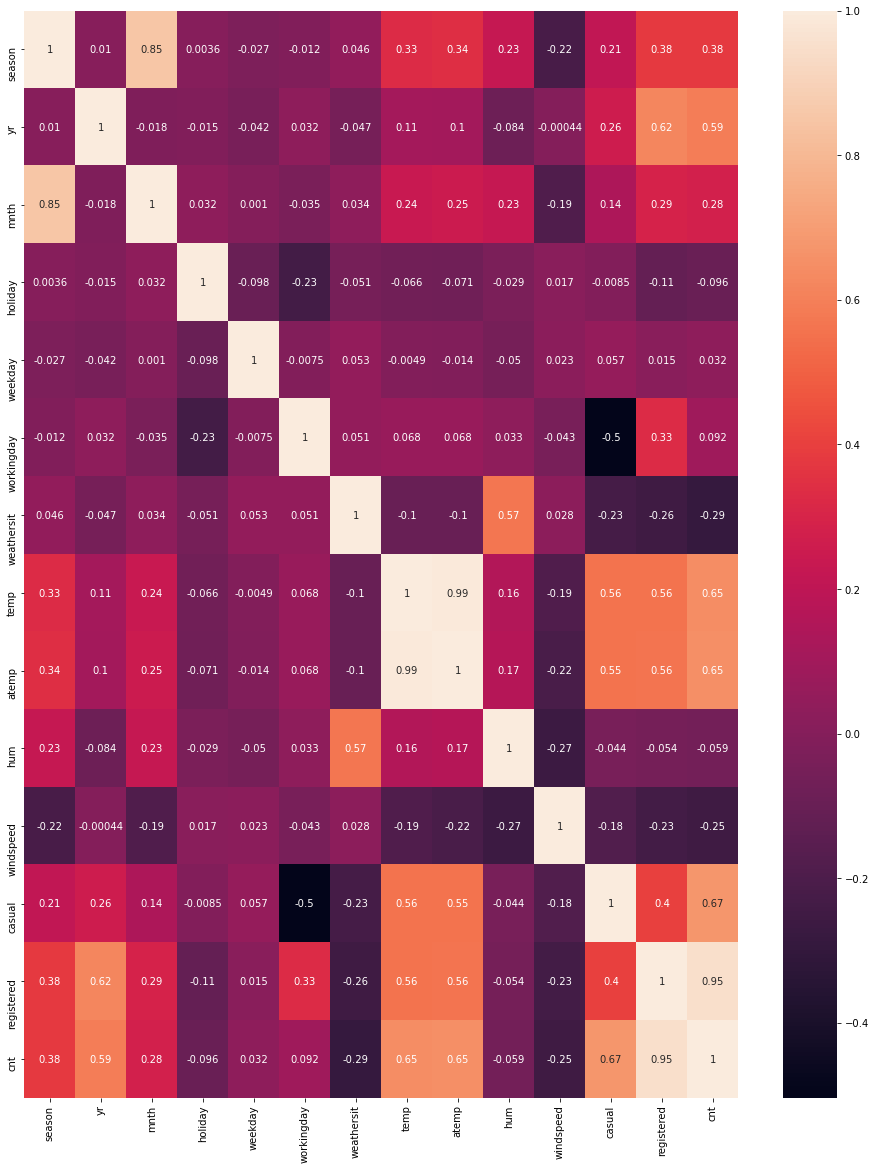

In [571]:
#Heatmap
plt.figure(figsize = (16,20))
sns.heatmap(df_train.corr(),annot=True)

#### Cnt is highly positively correlated with yr,season,temp, atemp
#### Cnt is negatively correlated with weathersit,hum and windspeed

In [572]:
y_train = df_train['cnt']
X_train = df_train
X_train.drop('cnt',axis=1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701
111,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.666667,1,0.636364,0,0.666667,1,0.0,0.863973,0.824359,0.679690,0.187140,0.298994,0.903552
53,0.000000,0,0.090909,0,0.500000,1,0.0,0.202618,0.218747,0.435939,0.111379,0.041756,0.253826
350,1.000000,0,1.000000,0,1.000000,0,0.5,0.248216,0.223544,0.577930,0.431816,0.083206,0.352873
79,0.333333,0,0.181818,0,0.166667,1,0.5,0.462664,0.434043,0.759870,0.529881,0.121609,0.239099


In [573]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [574]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', False, 4),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 3),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('cnt', True, 1)]

In [575]:
#According to RFE the predictor variables are season,yr,mnth,holiday,
#workingday,temp,hum,windspeed,casual and registered
#We can use this as a base and check manually also

In [576]:
#Train the model based on RFE and see the statistic significance

In [577]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weathersit', 'temp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [578]:
X_train.columns[~rfe.support_]

Index(['season', 'weekday', 'workingday', 'atemp'], dtype='object')

In [579]:
X_train_rfe = X_train[col]
X_train_rfe.drop('casual',axis=1)
X_train_rfe.drop('registered',axis=1)
X_train_rfe.drop('cnt',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [580]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [581]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.926e+30
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:19:28   Log-Likelihood:                 17157.
No. Observations:                 510   AIC:                        -3.429e+04
Df Residuals:                     500   BIC:                        -3.425e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.274e-16   1.87e-16      2.820      0.005     1.6e-16    8.95e-16
yr         -6.332e-17   8.17e-17     -0.775      0.439   -2.24e-16    9.72e-17
mnth       -1.145e-16   9.54e-17     -1.201      0.230   -3.02e-16    7.29e-17
holiday     6.939e-17   1.72e-16      0.403      0.687   -2.69e-16    4.07e-16
weathersit  4.649e-16   1.29e-16      3.595      0.000    2.11e-16    7.19e-16
temp       -6.939e-17   1.82e-16     -0.381      0.704   -4.28e-16    2.89e-16
hum        -1.249e-16   2.47e-16     -0.505      0.614   -6.11e-16    3.61e-16
windspeed  -2.637e-16   1.75e-16     -1.509      0.132   -6.07e-16    7.97e-17
casual         0.2124   1.52e-16    1.4e+15      0.000       0.212       0.212
registered     0.4483   1.43e-16   3.13e+15      0.000       0.448       0.448
cnt            0.4374   1.12e-16   3.89e+15      0.000       0.437       0.437
==============================================================================
Omnibus:                       10.043   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.129
Skew:                          -0.313   Prob(JB):                      0.00632
Kurtosis:                       3.292   Cond. No.                     1.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Build the model using all the variables and then check the statistics

### Model 1

In [582]:
y_train = df_train['cnt']
X_train = df_train
X_train.drop('cnt',axis=1)

X_train_sm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.134e+29
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:19:28   Log-Likelihood:                 16170.
No. Observations:                 510   AIC:                        -3.231e+04
Df Residuals:                     496   BIC:                        -3.225e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.082e-15   1.38e-15      0.782      0.435   -1.64e-15     3.8e-15
season      6.453e-16   1.03e-15      0.625      0.532   -1.38e-15    2.67e-15
yr          7.633e-16   6.19e-16      1.234      0.218   -4.52e-16    1.98e-15
mnth         2.29e-16   1.14e-15      0.201      0.841   -2.01e-15    2.47e-15
holiday     1.388e-17   1.24e-15      0.011      0.991   -2.41e-15    2.44e-15
weekday     1.943e-16   5.66e-16      0.343      0.731   -9.17e-16    1.31e-15
workingday  3.469e-16   7.29e-16      0.476      0.634   -1.09e-15    1.78e-15
weathersit -1.527e-16   9.24e-16     -0.165      0.869   -1.97e-15    1.66e-15
temp        -1.11e-16   5.82e-15     -0.019      0.985   -1.16e-14    1.13e-14
atemp       1.554e-15   6.24e-15      0.249      0.803   -1.07e-14    1.38e-14
hum         5.829e-16   1.73e-15      0.336      0.737   -2.82e-15    3.99e-15
windspeed   4.025e-16   1.23e-15      0.327      0.744   -2.01e-15    2.82e-15
casual         0.2124   1.75e-15   1.21e+14      0.000       0.212       0.212
registered     0.4483   1.45e-15   3.09e+14      0.000       0.448       0.448
cnt            0.4374   8.68e-16   5.04e+14      0.000       0.437       0.437
==============================================================================
Omnibus:                       23.500   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.628
Skew:                           0.401   Prob(JB):                     5.47e-05
Kurtosis:                       2.472   Cond. No.                     2.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [583]:
#Get the VIF
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,casual,inf
12,registered,inf
13,cnt,inf
8,atemp,350.81
7,temp,335.63
9,hum,16.62
2,mnth,13.39
0,season,12.15
5,workingday,10.05
1,yr,5.70


### Model 2
#### VIF of casual and registered with cnt is infinity
#### This means they are highly co-related and hence can be dropped

In [584]:
#Drop Casual and Registered
y_train = df_train['cnt']
X_train = df_train
X_train = X_train.drop('cnt',axis=1)
X_train = X_train.drop('casual',axis=1)
X_train = X_train.drop('registered',axis=1)
X_train_sm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.86e-168
Time:                        19:19:28   Log-Likelihood:                 454.40
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     498   BIC:                            -834.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1818      0.032      5.672      0.000       0.119       0.245
season         0.1409      0.024      5.901      0.000       0.094       0.188
yr             0.2349      0.009     26.035      0.000       0.217       0.253
mnth          -0.0156      0.027     -0.570      0.569      -0.069       0.038
holiday       -0.0686      0.029     -2.341      0.020      -0.126      -0.011
weekday        0.0473      0.013      3.516      0.000       0.021       0.074
workingday     0.0194      0.010      1.974      0.049    9.27e-05       0.039
weathersit    -0.1581      0.021     -7.530      0.000      -0.199      -0.117
temp           0.2136      0.140      1.531      0.127      -0.061       0.488
atemp          0.2828      0.150      1.889      0.059      -0.011       0.577
hum           -0.0972      0.042     -2.341      0.020      -0.179      -0.016
windspeed     -0.1575      0.029     -5.477      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.779   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.597
Skew:                          -0.662   Prob(JB):                     6.58e-32
Kurtosis:                       5.237   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [585]:
vif = pd.DataFrame()
X = X_train
#X = X.drop('cnt',axis=1)
#X = X.drop('casual',axis=1)
#X = X.drop('registered',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,346.93
7,temp,333.32
9,hum,16.05
2,mnth,13.27
0,season,11.26
10,windspeed,3.74
5,workingday,3.14
4,weekday,3.03
6,weathersit,2.19
1,yr,2.01


### Model 3

##### mth has very high p-value we can drop that first

In [586]:
y_train = df_train['cnt']
X_train = df_train
X_train = X_train.drop('cnt',axis=1)
X_train = X_train.drop('casual',axis=1)
X_train = X_train.drop('registered',axis=1)
X_train = X_train.drop('mnth',axis=1)

X_train_sm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.29e-169
Time:                        19:19:28   Log-Likelihood:                 454.24
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     499   BIC:                            -839.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1806      0.032      5.651      0.000       0.118       0.243
season         0.1295      0.013      9.880      0.000       0.104       0.155
yr             0.2350      0.009     26.082      0.000       0.217       0.253
holiday       -0.0694      0.029     -2.371      0.018      -0.127      -0.012
weekday        0.0469      0.013      3.490      0.001       0.020       0.073
workingday     0.0196      0.010      1.991      0.047       0.000       0.039
weathersit    -0.1571      0.021     -7.514      0.000      -0.198      -0.116
temp           0.2144      0.139      1.538      0.125      -0.060       0.488
atemp          0.2832      0.150      1.892      0.059      -0.011       0.577
hum           -0.0997      0.041     -2.417      0.016      -0.181      -0.019
windspeed     -0.1577      0.029     -5.489      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.112   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.702
Skew:                          -0.656   Prob(JB):                     1.70e-31
Kurtosis:                       5.224   Cond. No.                         85.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [587]:
vif = pd.DataFrame()
X = X_train
#X = X.drop('cnt',axis=1)
#X = X.drop('casual',axis=1)
#X = X.drop('registered',axis=1)
#X = X.drop('mnth',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,346.93
6,temp,333.25
8,hum,15.13
9,windspeed,3.73
0,season,3.40
4,workingday,3.14
3,weekday,3.01
5,weathersit,2.16
1,yr,2.01
2,holiday,1.09


### Model 4

#### next drop temp

In [588]:
y_train = df_train['cnt']
X_train = df_train
X_train = X_train.drop('cnt',axis=1)
X_train = X_train.drop('casual',axis=1)
X_train = X_train.drop('registered',axis=1)
X_train = X_train.drop('mnth',axis=1)
X_train = X_train.drop('temp',axis=1)

X_train_sm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.80e-170
Time:                        19:19:28   Log-Likelihood:                 453.03
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     500   BIC:                            -843.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1778      0.032      5.565      0.000       0.115       0.241
season         0.1295      0.013      9.869      0.000       0.104       0.155
yr             0.2353      0.009     26.088      0.000       0.218       0.253
holiday       -0.0678      0.029     -2.315      0.021      -0.125      -0.010
weekday        0.0481      0.013      3.585      0.000       0.022       0.075
workingday     0.0198      0.010      2.014      0.045       0.000       0.039
weathersit    -0.1561      0.021     -7.461      0.000      -0.197      -0.115
atemp          0.5104      0.023     21.845      0.000       0.465       0.556
hum           -0.1028      0.041     -2.492      0.013      -0.184      -0.022
windspeed     -0.1507      0.028     -5.306      0.000      -0.207      -0.095
==============================================================================
Omnibus:                       63.967   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.102
Skew:                          -0.658   Prob(JB):                     5.68e-34
Kurtosis:                       5.339   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [589]:
vif = pd.DataFrame()
X = X_train
#X = X.drop('cnt',axis=1)
#X = X.drop('casual',axis=1)
#X = X.drop('registered',axis=1)
#X = X.drop('mnth',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,14.79
6,atemp,8.22
8,windspeed,3.64
0,season,3.40
4,workingday,3.14
3,weekday,3.00
5,weathersit,2.16
1,yr,2.01
2,holiday,1.09


### Model 5

In [590]:
#Remove Working day
y_train = df_train['cnt']
X_train = df_train
X_train = X_train.drop('cnt',axis=1)
X_train = X_train.drop('casual',axis=1)
X_train = X_train.drop('registered',axis=1)
X_train = X_train.drop('mnth',axis=1)
X_train = X_train.drop('temp',axis=1)
X_train = X_train.drop('workingday',axis=1)

X_train_sm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.19e-170
Time:                        19:19:28   Log-Likelihood:                 450.97
No. Observations:                 510   AIC:                            -883.9
Df Residuals:                     501   BIC:                            -845.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1921      0.031      6.148      0.000       0.131       0.254
season         0.1285      0.013      9.768      0.000       0.103       0.154
yr             0.2357      0.009     26.060      0.000       0.218       0.254
holiday       -0.0812      0.029     -2.840      0.005      -0.137      -0.025
weekday        0.0472      0.013      3.509      0.000       0.021       0.074
weathersit    -0.1540      0.021     -7.344      0.000      -0.195      -0.113
atemp          0.5133      0.023     21.940      0.000       0.467       0.559
hum           -0.1043      0.041     -2.520      0.012      -0.186      -0.023
windspeed     -0.1530      0.028     -5.372      0.000      -0.209      -0.097
==============================================================================
Omnibus:                       69.519   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.368
Skew:                          -0.729   Prob(JB):                     4.08e-35
Kurtosis:                       5.308   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [591]:
vif = pd.DataFrame()
X = X_train
#X = X.drop('cnt',axis=1)
#X = X.drop('casual',axis=1)
#X = X.drop('registered',axis=1)
#X = X.drop('mnth',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,13.81
5,atemp,8.13
7,windspeed,3.60
0,season,3.39
3,weekday,3.00
4,weathersit,2.15
1,yr,2.00
2,holiday,1.04


### Model 6

In [592]:
#remove Humidity
y_train = df_train['cnt']
X_train = df_train
X_train = X_train.drop('cnt',axis=1)
X_train = X_train.drop('casual',axis=1)
X_train = X_train.drop('registered',axis=1)
X_train = X_train.drop('mnth',axis=1)
X_train = X_train.drop('temp',axis=1)
X_train = X_train.drop('workingday',axis=1)
X_train = X_train.drop('hum',axis=1)

X_train_sm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     284.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.91e-170
Time:                        19:19:28   Log-Likelihood:                 447.76
No. Observations:                 510   AIC:                            -879.5
Df Residuals:                     502   BIC:                            -845.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.019      6.837      0.000       0.092       0.166
season         0.1244      0.013      9.479      0.000       0.099       0.150
yr             0.2381      0.009     26.315      0.000       0.220       0.256
holiday       -0.0819      0.029     -2.848      0.005      -0.138      -0.025
weekday        0.0506      0.013      3.755      0.000       0.024       0.077
weathersit    -0.1865      0.017    -11.226      0.000      -0.219      -0.154
atemp          0.5023      0.023     21.738      0.000       0.457       0.548
windspeed     -0.1326      0.027     -4.831      0.000      -0.187      -0.079
==============================================================================
Omnibus:                       67.756   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.167
Skew:                          -0.724   Prob(JB):                     4.06e-33
Kurtosis:                       5.219   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [593]:
vif = pd.DataFrame()
X = X_train
#X = X.drop('cnt',axis=1)
#X = X.drop('casual',axis=1)
#X = X.drop('registered',axis=1)
#X = X.drop('mnth',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,5.36
0,season,3.18
6,windspeed,3.15
3,weekday,2.83
1,yr,1.98
4,weathersit,1.52
2,holiday,1.03


In [594]:
### Model 7

In [595]:
#Fairly Good Model. Remove holiday and check
y_train = df_train['cnt']
X_train = df_train
X_train = X_train.drop('cnt',axis=1)
X_train = X_train.drop('casual',axis=1)
X_train = X_train.drop('registered',axis=1)
X_train = X_train.drop('mnth',axis=1)
X_train = X_train.drop('temp',axis=1)
X_train = X_train.drop('workingday',axis=1)
X_train = X_train.drop('hum',axis=1)
X_train = X_train.drop('holiday',axis=1)

X_train_sm = sm.add_constant(X_train)

lm_2 = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     326.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.54e-170
Time:                        19:19:28   Log-Likelihood:                 443.67
No. Observations:                 510   AIC:                            -873.3
Df Residuals:                     503   BIC:                            -843.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1227      0.019      6.496      0.000       0.086       0.160
season         0.1232      0.013      9.325      0.000       0.097       0.149
yr             0.2384      0.009     26.170      0.000       0.221       0.256
weekday        0.0542      0.013      4.020      0.000       0.028       0.081
weathersit    -0.1838      0.017    -11.004      0.000      -0.217      -0.151
atemp          0.5075      0.023     21.881      0.000       0.462       0.553
windspeed     -0.1334      0.028     -4.826      0.000      -0.188      -0.079
==============================================================================
Omnibus:                       75.462   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.604
Skew:                          -0.779   Prob(JB):                     7.38e-39
Kurtosis:                       5.416   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [596]:
vif = pd.DataFrame()
X = X_train
#X = X.drop('cnt',axis=1)
#X = X.drop('casual',axis=1)
#X = X.drop('registered',axis=1)
#X = X.drop('mnth',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.36
0,season,3.17
5,windspeed,3.12
2,weekday,2.82
1,yr,1.98
3,weathersit,1.52


In [597]:
#There is significant change in R2 value so we will keep atemp

## Step 4: Residual Analysis

In [598]:
y_train_pred = lm_2.predict(X_train_sm)

Text(0.5, 0, 'Errors')

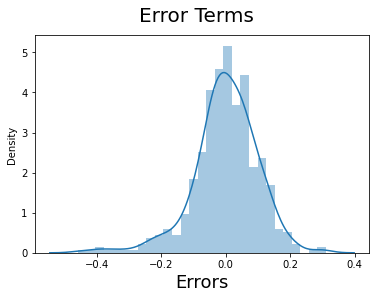

In [599]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [600]:
X_train_sm.head()

,const,season,yr,weekday,weathersit,atemp,windspeed
576,1.0,0.666667,1,0.333333,0.0,0.766351,0.264686
426,1.0,0.000000,1,1.000000,0.5,0.438975,0.255342
728,1.0,0.000000,1,0.000000,0.0,0.200348,0.663106
482,1.0,0.333333,1,1.000000,0.5,0.391735,0.188475
111,1.0,0.333333,0,0.833333,0.5,0.318819,0.380981


(510, 7)
(510,)


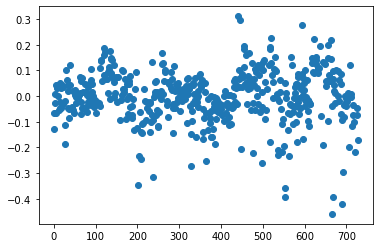

In [601]:
# look for patterns in residuals and it shud not have a pattern
print(X_train_sm.shape)
print((y_train_pred-y_train).shape)

#residuals = y_train-y_train_pred
plt.scatter(X_train_sm.index,y_train-y_train_pred)

### Errors are centered around zero

## Step 5: Predictions and Evaluations on the Test Set

In [602]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029


In [603]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [604]:
y_test = df_test['cnt']
X_test = df_test
X_test = X_test.drop('cnt',axis=1)
X_test = X_test.drop('casual',axis=1)
X_test = X_test.drop('registered',axis=1)
X_test = X_test.drop('mnth',axis=1)
X_test = X_test.drop('temp',axis=1)
X_test = X_test.drop('workingday',axis=1)
X_test = X_test.drop('hum',axis=1)

X_test_sm = sm.add_constant(X_test)
y_test_pred = lm.predict(X_test_sm)

#lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
#lm.summary()

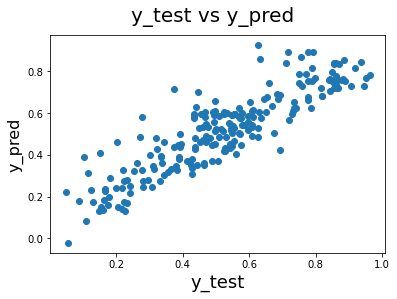

In [609]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

ValueError: x and y must be the same size

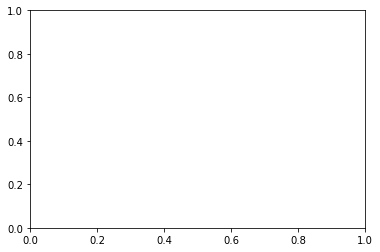

In [610]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

In [611]:
r2_score(y_test, y_test_pred)

0.7815289564483858

## RESULTS

###     Variables that are significant in predicting the demand for shared bikes.
   #### - atemp 	
   #### - season 	
   #### - windspeed 	
   #### - weekday 	
   #### - yr 	
   #### - weathersit 
    
###     How well those variables describe the bike demands
   #### The R2 Score of the final model is .796 which means 79% of the variance is explained by this model
    
### Final equation representing the model

##### We can see that the equation of our best fitted line is:
##### cnt=0.1232×season + 0.2384×yr - 0.0542×weekday - 0.1838×weathersit + 0.5075×atemp - 0.1334×windspeed